In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# all graphs are in terms of total from 90 days, have not scaled from 90 days to 365/366 days total

In [2]:
documents = os.chdir("Filtered_Peak_Hour/")
!pwd

/home/jovyan/storage/Group Project/Filtered_Peak_Hour


In [3]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
os.chdir("..")
combined_csv.to_csv( "Peak_hour_overtime.csv", index=False, encoding='utf-8-sig')

In [4]:
df = pd.read_csv("Peak_hour_overtime.csv")
df

,NB_SCATS_SITE,QT_INTERVAL_COUNT,from8to9,from3to6_30,combined_peak
0,4415,2014,890100.0,2364701.0,3254801.0
1,3380,2014,681722.0,2549882.0,3231604.0
2,3519,2014,846159.0,2196732.0,3042891.0
3,416,2014,843006.0,2174718.0,3017724.0
4,2404,2014,826555.0,2185773.0,3012328.0
...,...,...,...,...,...
695,2100,2020,428028.0,1208941.0,1636969.0
696,256,2020,398027.0,1236963.0,1634990.0
697,5313,2020,365377.0,1265984.0,1631361.0
698,2103,2020,396547.0,1232534.0,1629081.0


In [5]:
df2 = df.groupby(['NB_SCATS_SITE','QT_INTERVAL_COUNT']).agg({'from8to9':sum,'from3to6_30':sum,'combined_peak':sum}).reset_index()
df2

,NB_SCATS_SITE,QT_INTERVAL_COUNT,from8to9,from3to6_30,combined_peak
0,117,2014,603891.0,1677669.0,2281560.0
1,117,2015,572711.0,1625655.0,2198366.0
2,117,2016,611300.0,1638859.0,2250159.0
3,117,2017,568782.0,1586944.0,2155726.0
4,117,2018,565487.0,1564202.0,2129689.0
...,...,...,...,...,...
695,5003,2019,693178.0,1767260.0,2460438.0
696,5003,2020,548584.0,1493661.0,2042245.0
697,5296,2014,638140.0,1601942.0,2240082.0
698,5296,2020,498539.0,1375071.0,1873610.0


In [6]:
df2.sort_values(by=['combined_peak','from3to6_30','from8to9','QT_INTERVAL_COUNT'], inplace=True,ascending= False)
df2.head(100)

,NB_SCATS_SITE,QT_INTERVAL_COUNT,from8to9,from3to6_30,combined_peak
553,3380,2019,825438.0,3235902.0,4061340.0
122,849,2019,1034940.0,2495638.0,3530578.0
672,4415,2019,976359.0,2442899.0,3419258.0
669,4415,2016,928508.0,2443412.0,3371920.0
670,4415,2017,916824.0,2448993.0,3365817.0
...,...,...,...,...,...
91,538,2019,768216.0,1935207.0,2703423.0
48,415,2017,757986.0,1934467.0,2692453.0
559,3381,2019,640873.0,2049799.0,2690672.0
50,415,2019,781169.0,1906878.0,2688047.0


In [7]:
#median of all top 100 roads
median100 = df2.groupby('QT_INTERVAL_COUNT').median()/(1000)
median100

,NB_SCATS_SITE,from8to9,from3to6_30,combined_peak
QT_INTERVAL_COUNT,,,,
2014,2.4235,618.8955,1663.6170,2288.8655
2015,2.4095,585.1625,1592.6765,2192.5380
2016,2.4060,621.4330,1650.3245,2284.4625
2017,2.4140,592.6515,1640.6735,2255.3430
2018,2.4075,593.9725,1615.3480,2211.6010
2019,2.4215,653.8390,1716.0525,2362.9260
2020,2.6135,480.3020,1346.1220,1834.4495


In [8]:
# medain of only top x roads: Clearly the median over the years doesnt change much since vehicle increase isnt a large %
# not necessary atm
df3 = df2
df3.sort_values(by=['QT_INTERVAL_COUNT','combined_peak','NB_SCATS_SITE'], inplace=True,ascending= False)
df4 = df3.groupby('QT_INTERVAL_COUNT').head(100).reset_index(drop=True)
df4.groupby('QT_INTERVAL_COUNT')['combined_peak'].median()
median100 = df4.groupby('QT_INTERVAL_COUNT').median()/1000
median100

,NB_SCATS_SITE,from8to9,from3to6_30,combined_peak
QT_INTERVAL_COUNT,,,,
2014,2.4235,618.8955,1663.6170,2288.8655
2015,2.4095,585.1625,1592.6765,2192.5380
2016,2.4060,621.4330,1650.3245,2284.4625
2017,2.4140,592.6515,1640.6735,2255.3430
2018,2.4075,593.9725,1615.3480,2211.6010
2019,2.4215,653.8390,1716.0525,2362.9260
2020,2.6135,480.3020,1346.1220,1834.4495


In [9]:
pop = pd.read_csv("population_growth.csv")
veh_pop = pd.read_csv("vehicle_population_overtime.csv")
veh_pop

,Year,Vehicle#,Veh_Growth %
0,2014,4483098,2.3
1,2015,4567314,1.9
2,2016,4681497,2.5
3,2017,4798534,2.5
4,2018,4923296,2.6
5,2019,5031609,2.2
6,2020,5122178,1.8


In [10]:
pop['estimated_vehicles'] = pd.Series((veh_pop['Vehicle#'])/1000)
pop

,Population,Year,Change,% Change,estimated_vehicles
0,5841.7,2014,106.7,1.9,4483.098
1,5938.1,2015,99.4,1.7,4567.314
2,6068.0,2016,123.1,2.1,4681.497
3,6323.6,2017,144.4,2.3,4798.534
4,6459.8,2018,138.2,2.2,4923.296
5,6594.8,2019,132.8,2.1,5031.609
6,6694.9,2020,98.0,1.5,5122.178


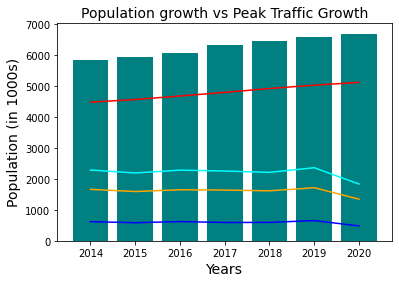

In [11]:
xAxis = [i + 0.5 for i, _ in enumerate(pop['Year'])] 
plt.plot(xAxis, median100['combined_peak'], color='cyan')
plt.plot(xAxis, median100['from8to9'], color='blue')
plt.plot(xAxis, median100['from3to6_30'], color='orange')
plt.plot(xAxis, pop['estimated_vehicles'], color='red')
plt.bar(xAxis, pop['Population'], color='teal')
plt.title('Population growth vs Peak Traffic Growth', fontsize=14)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Population (in 1000s)', fontsize=14)
plt.xticks([i + 0.5 for i, _ in enumerate(pop['Year'])], pop['Year'])
plt.show()